In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# Cities
cities = ['Szolnok', 'Cegléd', 'Kecskemét', 'Debrecen', 'Jászberény', 'Szeged', 'Szentes', 'Hatvan']

# City boundary and industrial zone
city_boundaries = []
industrial_landuse = []

In [3]:
for city in cities:
    # City boundary
    gdf = ox.geocode_to_gdf(city + ', Hungary')
    city_boundaries.append(gdf)

    # Industrial zone
    industrial = ox.features.features_from_polygon(
        gdf.geometry.values[0], tags={'landuse': 'industrial'}
    )
    industrial_landuse.append(industrial)

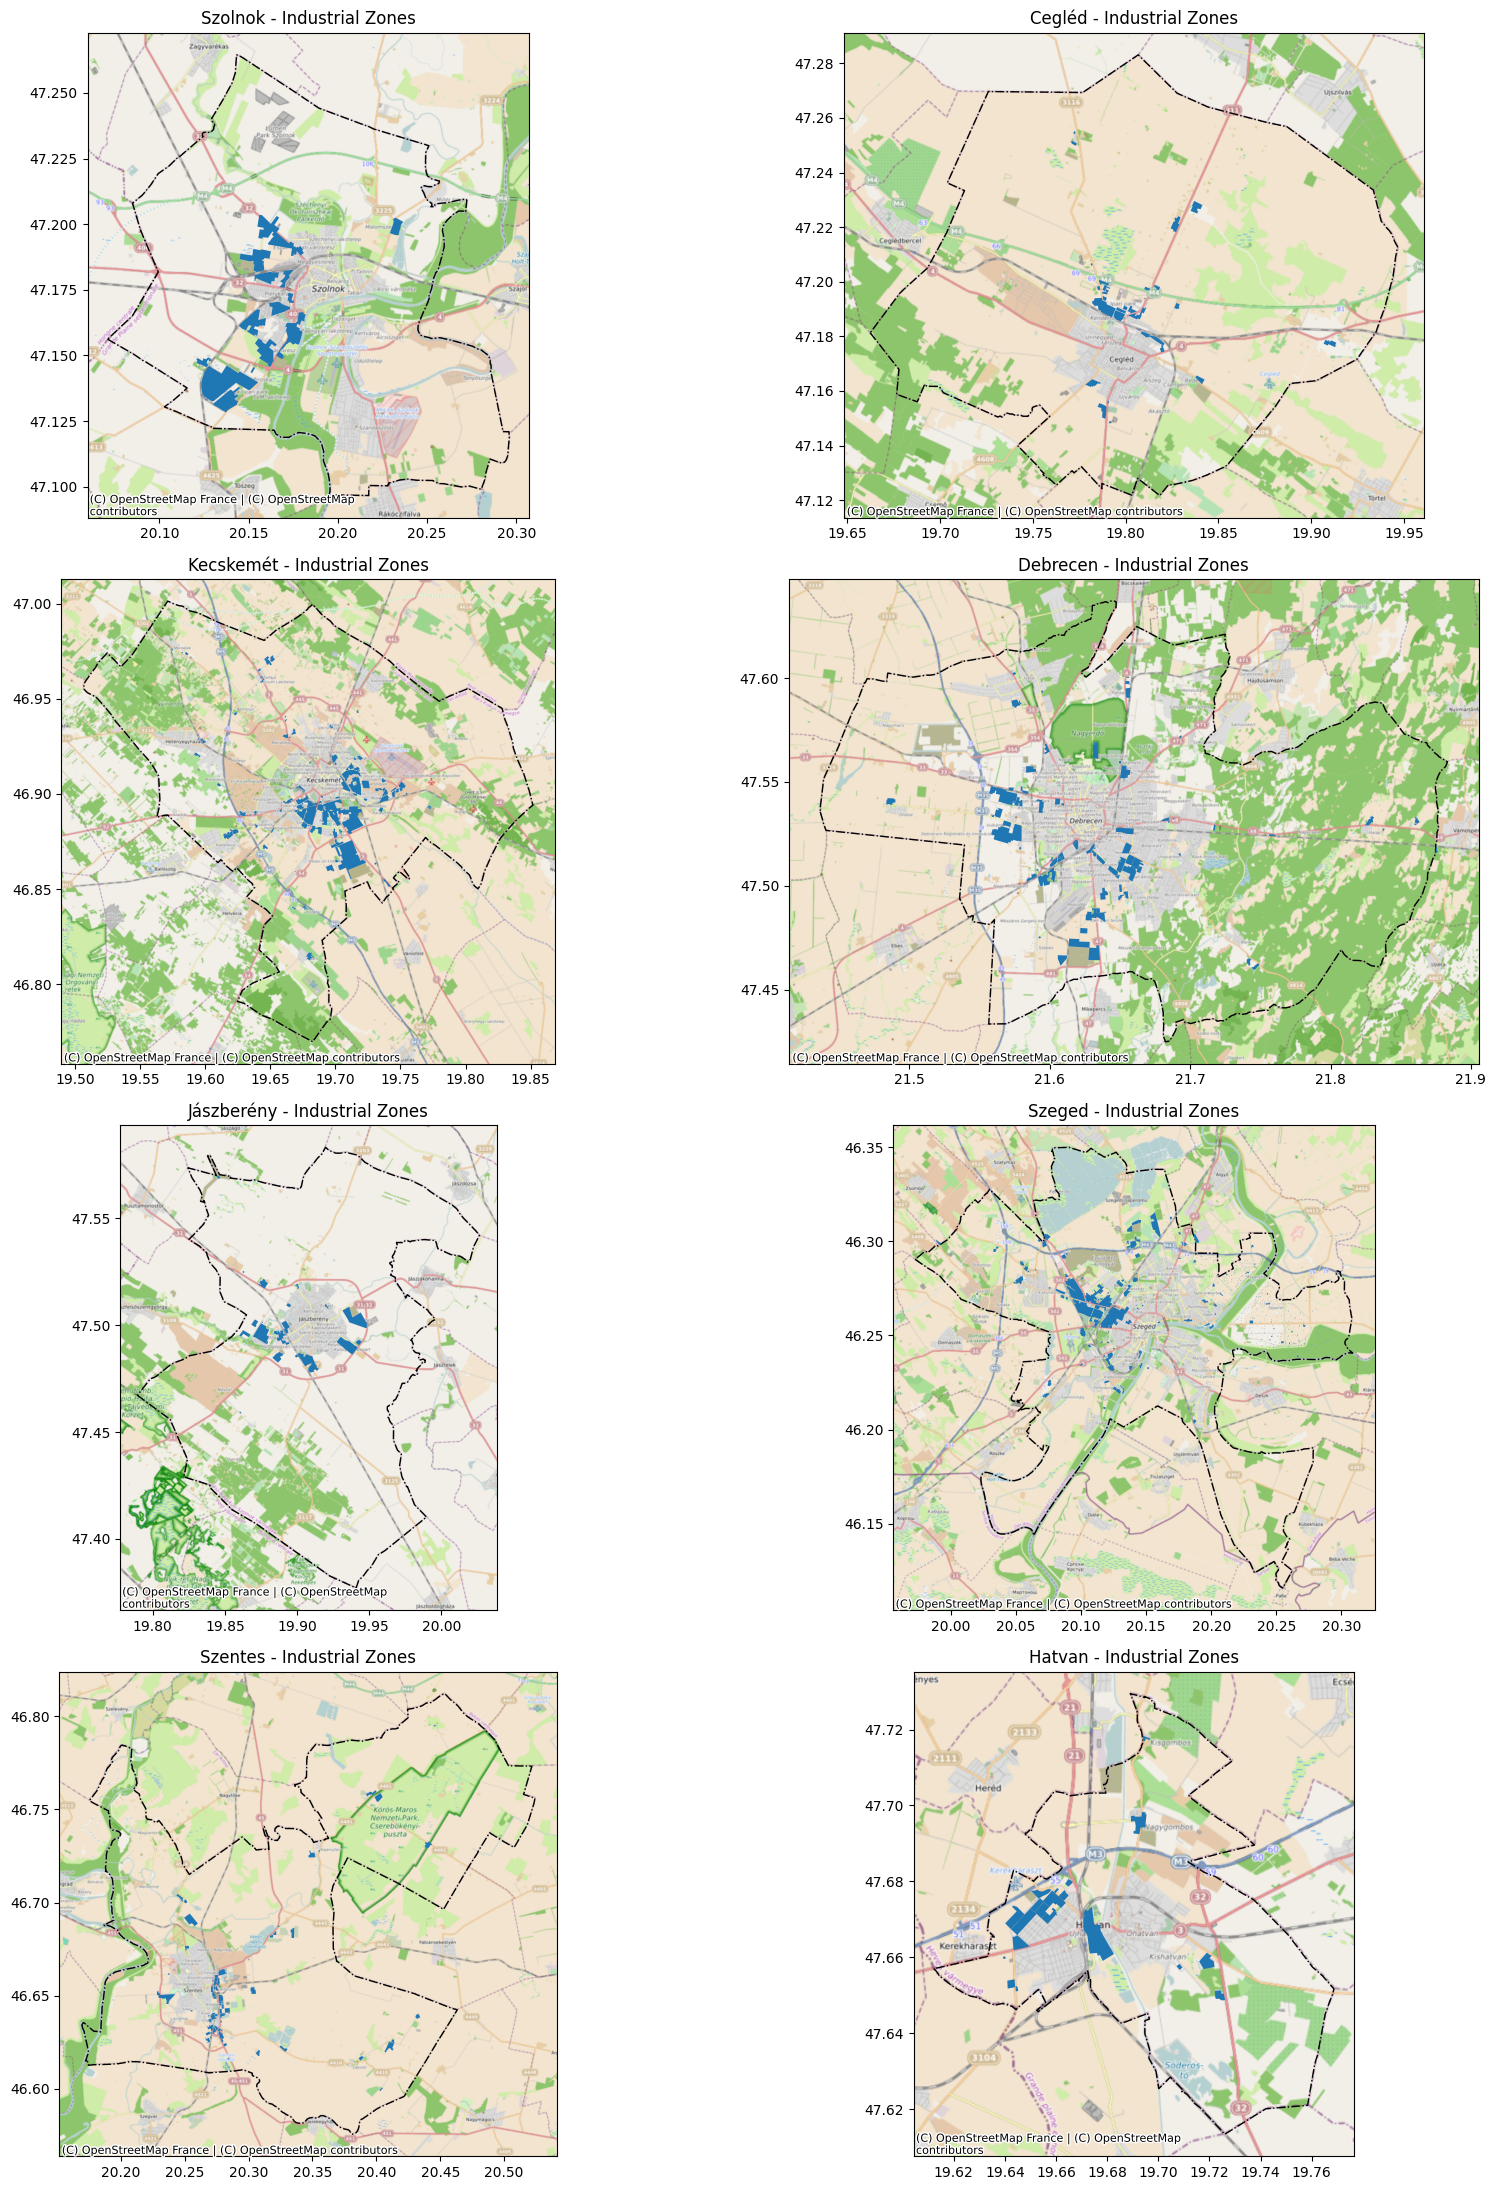

In [4]:
# Plot
fig, axes = plt.subplots(4, 2, figsize=(18, 22))
axes = axes.flatten()

for i, ax in enumerate(axes):
    city_boundaries[i].plot(ax=ax, facecolor='none', edgecolor='k', ls='-.')

    if not industrial_landuse[i].empty:
        industrial_landuse[i].plot(ax=ax, color='tab:blue')

    # Add basemap
    ctx.add_basemap(
        ax, 
        crs=city_boundaries[i].crs, 
        # source=ctx.providers.OpenStreetMap.HOT,
        source=ctx.providers.OpenStreetMap.France,
        zoom=12
    )

    # Title
    ax.set_title(f"{cities[i]} - Industrial Zones")

plt.tight_layout()
plt.savefig('Industrial Zones.png', dpi=600, bbox_inches='tight')
plt.show()